In [ ]:
'''
Diya Ganesh, Emma Penn, Brianna Quinn
May 20, 2024
DS3000 - Practicum 1
'''

'\nDiya Ganesh, Emma Penn, Brianna Quinn\nMay 20, 2024\nDS3000 - Practicum 1\n'

### Question 1 — The DS Problem (2 points)

In your own words, formulate the Data Science problem.

The problem we intend to address relates to the analysis of air traffic patterns. Our investigation focuses on the the frequency of flights by state (AZ, CA, and NV), airport (both inbound and outbound), and airline. We also investigate the frequency of delays by airline to identify which one has the best record. We are looking to analyze air traffic patterns by airport & state, and also identify which airlines and carriers are more prone to delays.

The focus of this project is to look at flight patterns between airlines, states, and aircraft carrier. Some of our goals include comparing states based on air traffic and most popular airport destinations as well as which carriers have the largest percentage of flights, the best record, and flight hours per month.

### Question 2 — Prepare the Data (8 pts)

1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
3. At a high level explain what the dataset is about and prepare at least three visualizations to support your explanation.
Note: this explanation should be relevant to the DS Problem in question 1.


The dataset contains flights information for 2019 flights that comes from the Bureau of Transportation Statistics. Some of the information includes:
Departure/Arrival Times,
Arrival/Departure Delays,
Origin/Destination States & Airports,
Airline (Carrier) Code,
Aircraft Number. Such information can be used to analyze which carrier performs the best, which states perform the best, and compare common routes/and traffic amongst carriers and states (California, Arizona, and Nevada).

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the csv into a dataframe
airline_df = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')
airline_df.head()

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947


In [ ]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB


In [ ]:
# Convert columns to suitable types
airline_df =  airline_df.convert_dtypes()
print(airline_df.dtypes)

FL_DATE         string[python]
CARRIER_CODE    string[python]
TAIL_NUM        string[python]
FL_NUM                   Int64
ORIGIN          string[python]
ORIGIN_ST       string[python]
DEST            string[python]
DEST_ST         string[python]
DEP_TIME                 Int64
DEP_DELAY                Int64
ARR_TIME                 Int64
ARR_DELAY                Int64
ELAPSED_TIME             Int64
DISTANCE                 Int64
dtype: object


In [ ]:
# Convert FL_DATE column to datetime datatype
airline_df['FL_DATE'] = pd.to_datetime(airline_df['FL_DATE'], format='%Y-%m-%d')

# Convert DEP_TIME and ARR_TIME columns to strings and ensures their lengths are 4 characters long
airline_df['DEP_TIME'] = airline_df['DEP_TIME'].astype(str).str.zfill(4)
airline_df['ARR_TIME'] = airline_df['ARR_TIME'].astype(str).str.zfill(4)

# Convert to datetime datatype
airline_df['DEP_TIME'] = pd.to_datetime(airline_df['DEP_TIME'], format='%H%M', errors='coerce')
airline_df['ARR_TIME'] = pd.to_datetime(airline_df['ARR_TIME'], format='%H%M', errors='coerce')

# Overwrite the columns so that it only displays the time component
airline_df['DEP_TIME'] = airline_df['DEP_TIME'].dt.time
airline_df['ARR_TIME'] = airline_df['ARR_TIME'].dt.time

print(airline_df[['FL_DATE', 'DEP_TIME', 'ARR_TIME']].dtypes)
airline_df.head()

FL_DATE     datetime64[ns]
DEP_TIME            object
ARR_TIME            object
dtype: object


,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,08:28:00,0,13:53:00,0,205,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,19:07:00,0,21:59:00,0,112,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,19:04:00,104,20:16:00,101,192,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,17:29:00,4,22:15:00,3,166,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,06:56:00,0,08:41:00,0,285,1947


In [ ]:
# Identify how many null values are in each column
print(airline_df.isnull().sum().sort_values())

FL_DATE             0
CARRIER_CODE        0
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DISTANCE            0
TAIL_NUM         4791
DEP_DELAY       26715
DEP_TIME        26949
ARR_TIME        29196
ARR_DELAY       31884
ELAPSED_TIME    31884
dtype: int64


In [ ]:
# check for invalid values
for column in airline_df.columns:
    print(airline_df[column].isnull().sum())
    print(airline_df[column].value_counts())

# check for negative values for integer columns
nums_list = ['FL_NUM', 'DEP_DELAY', 'ARR_DELAY', 'ELAPSED_TIME']
for col in nums_list:
    print(airline_df[airline_df[col] < 0])

0
FL_DATE
2019-08-09    5730
2019-08-08    5726
2019-08-05    5712
2019-08-12    5704
2019-08-15    5701
              ... 
2019-02-09    4080
2019-01-26    4063
2019-02-02    4007
2019-01-19    3984
2019-11-28    3562
Name: count, Length: 365, dtype: int64
0
CARRIER_CODE
WN    556915
AA    286235
OO    239463
UA    235935
DL    187842
AS    149495
B6     57219
NK     54490
YV     42407
F9     35514
G4     34162
HA     15787
MQ      1791
YX       154
EV        94
Name: count, dtype: Int64
4791
TAIL_NUM
N706SK    1754
N726SK    1745
N742SK    1665
N716SK    1644
N719SK    1599
          ... 
N646UA       1
N246PS       1
N501DN       1
N59053       1
N69063       1
Name: count, Length: 4888, dtype: Int64
0
FL_NUM
546     2365
711     1973
504     1898
470     1846
531     1837
        ... 
6023       1
6721       1
6990       1
6340       1
6865       1
Name: count, Length: 6853, dtype: Int64
0
ORIGIN
LAX    219952
PHX    175328
SFO    170918
LAS    164020
SAN     93470
        ...  
TW

In [ ]:
# check the shapes of various filtered dataframes with null values
print(f"Null Departure Times: {airline_df[(airline_df['DEP_TIME'].isnull())].shape}")
print(f"Null Arrival Times: {airline_df[(airline_df['ARR_TIME'].isnull())].shape}")
print(f"Null Elapsed Times: {airline_df[(airline_df['ELAPSED_TIME'].isnull())].shape}")

# check for overlap in these dfs
print(f"Null Arrival AND Departure: {airline_df[(airline_df['DEP_TIME'].isnull()) & (airline_df['ARR_TIME'].isnull())].shape}")
print(f"Null Arrival AND Elapsed: {airline_df[(airline_df['ELAPSED_TIME'].isnull()) & (airline_df['ARR_TIME'].isnull())].shape}")

# drop rows that have null values in the elapsed time column
indices_to_drop = airline_df[airline_df['ELAPSED_TIME'].isnull()].index.to_list()

airline_df = airline_df.drop(indices_to_drop)

# check to see if there are any more rows that have null values
print(f"Null Elapsed Times: {airline_df[(airline_df['ELAPSED_TIME'].isnull())].shape}")

Null Departure Times: (26949, 14)
Null Arrival Times: (29196, 14)
Null Elapsed Times: (31884, 14)
Null Arrival AND Departure: (26708, 14)
Null Arrival AND Elapsed: (28247, 14)
Null Elapsed Times: (0, 14)


In [ ]:
print(airline_df['DEP_DELAY'].value_counts(ascending = False))

DEP_DELAY
0       1160572
1         51729
2         40276
3         34734
4         31233
         ...   
1333          1
1023          1
1079          1
1299          1
1128          1
Name: count, Length: 1238, dtype: Int64


In [ ]:
# Replace missing values in DEP_DELAY with 0
airline_df.loc[airline_df['DEP_DELAY'].isna(), 'DEP_DELAY'] = 0

In [ ]:
print(airline_df['ARR_DELAY'].value_counts(ascending = False))

ARR_DELAY
0       1212909
1         33311
2         30692
3         28312
4         26852
         ...   
952           1
1380          1
785           1
718           1
1156          1
Name: count, Length: 1227, dtype: Int64


In [ ]:
# Replace missing values in ARR_DELAY with 0
airline_df.loc[airline_df['ARR_DELAY'].isna(), 'ARR_DELAY'] = 0

In [ ]:
# See missing value counts
missing_arr = airline_df[airline_df["ARR_TIME"].isna()]
print(missing_arr["ELAPSED_TIME"].value_counts())

ELAPSED_TIME
70     10
80     10
79      9
87      9
75      8
       ..
436     1
97      1
42      1
192     1
224     1
Name: count, Length: 311, dtype: Int64


In [ ]:
# selecting out the states
states = ["CA", "NV", "AZ"]

for i in range(len(states)):
  if i == 0:
    selected_depstates = airline_df[airline_df["ORIGIN_ST"] == states[i]]
  else:
    state_dep = airline_df[airline_df["ORIGIN_ST"] == states[i]]
    selected_depstates = pd.concat([selected_depstates, state_dep])

print(selected_depstates["ORIGIN_ST"].value_counts())

ORIGIN_ST
CA    798690
AZ    201804
NV    181985
Name: count, dtype: Int64


In [ ]:
# changing if there is a departure delay to one to be able to get the count
selected_depstates.loc[selected_depstates["DEP_DELAY"]!=0, "DEP_DELAY"] = 1
print(selected_depstates["DEP_DELAY"].value_counts())

DEP_DELAY
0    744656
1    437823
Name: count, dtype: Int64


CARRIER_CODE
AA     60909
AS     26358
B6     11279
DL     34426
EV        14
F9      8162
G4      5741
HA      3044
MQ       401
NK      9293
OO     43270
UA     42111
WN    183503
YV      9291
YX        21
Name: DEP_DELAY, dtype: Int64


Text(0, 0.5, 'Count')

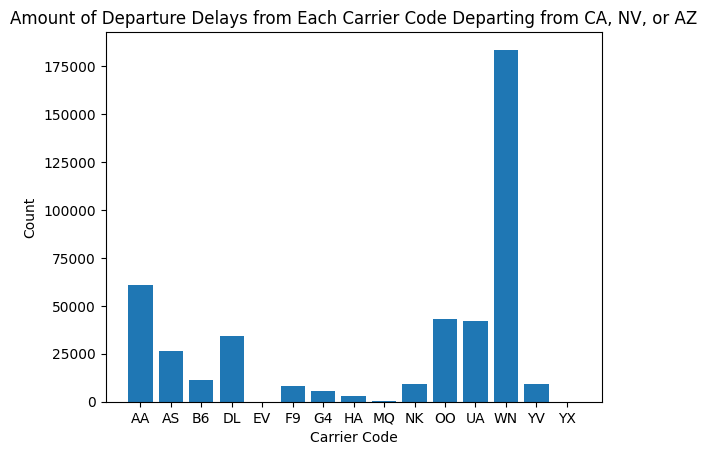

In [ ]:
# Using this to check the graph later
counts = selected_depstates.groupby("CARRIER_CODE")["DEP_DELAY"].sum()
ccode = pd.Series(selected_depstates["CARRIER_CODE"].unique())
ccode = ccode.sort_values()

print(counts)

# creating the graph
plt.bar(range(len(selected_depstates["CARRIER_CODE"].unique())), list(counts))
plt.xticks(range(len(selected_depstates["CARRIER_CODE"].unique())), ccode)
plt.title("Amount of Departure Delays from Each Carrier Code Departing from CA, NV, or AZ")
plt.xlabel("Carrier Code")
plt.ylabel("Count")

The bar graph above displays that the carrier code with the most common depature delays for the regions of CA, AZ, and NV is code WN. This suggests that there is a carrier code within the dataset that may have a more frequent pattern of delays.

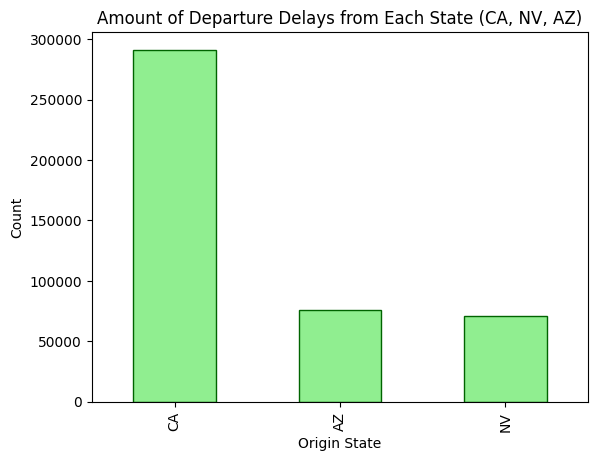

In [ ]:
# filter dataframe with departure delays in states of interest and find counts
departure_delays = airline_df[(airline_df['ORIGIN_ST'].isin(['CA', 'NV', 'AZ'])) & (airline_df['DEP_DELAY'] > 0)]
state_delays = departure_delays['ORIGIN_ST'].value_counts()

# create bar plot, assign bar and edge color, title, and axis labels
state_delays.plot(kind='bar', color='lightgreen', edgecolor='darkgreen')
plt.title("Amount of Departure Delays from Each State (CA, NV, AZ)")
plt.xlabel("Origin State")
plt.ylabel("Count")
plt.show()

The bar graph above shows that California is the state that has the highest count of departure delays.

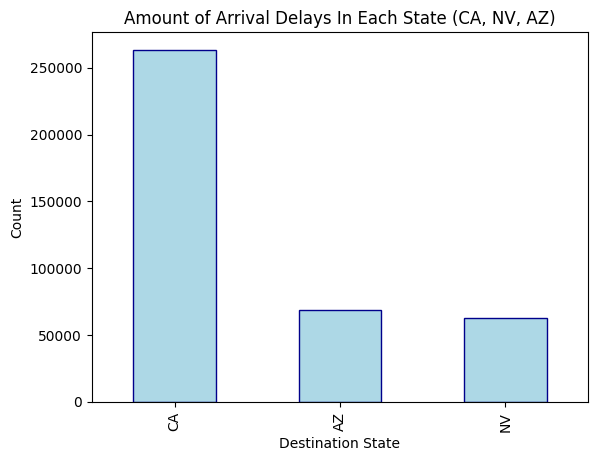

In [ ]:
# Filter dataframe with arrival delays in states of interest and find counts
arrival_delays = airline_df[(airline_df['ORIGIN_ST'].isin(['CA', 'NV', 'AZ'])) & (airline_df['ARR_DELAY'] > 0)]

# Get counts for arrival delays for each state
arrival_state_delays = arrival_delays['ORIGIN_ST'].value_counts()

# Create bar plot for arrival delays
arrival_state_delays.plot(kind='bar', color='lightblue', edgecolor='darkblue')
plt.title("Amount of Arrival Delays In Each State (CA, NV, AZ)")
plt.xlabel("Destination State")
plt.ylabel("Count")
plt.show()

The bar chart above shows the frequency in arrival delays by state. Similarly to the prior graph, California is shown to also have the highest count of arrival delays as well.

### Question 3 — (20 points)

1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results.
2. For each region, analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the top 5 results.


DEST_ST
CA    799137
AZ    201744
NV    182115
Name: count, dtype: Int64
ORIGIN_ST
CA    798690
AZ    201804
NV    181985
Name: count, dtype: Int64


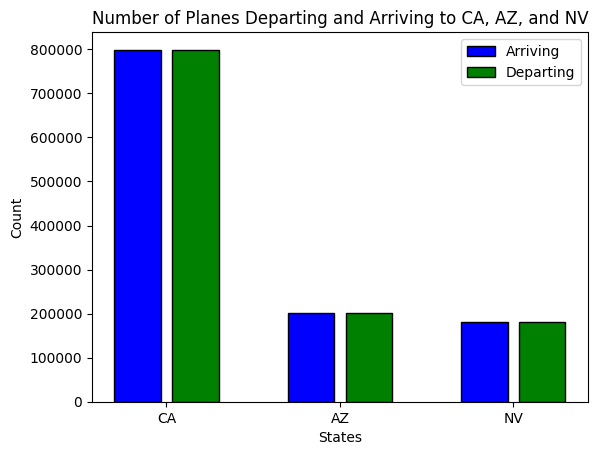

In [ ]:
# Filter data for flights arriving/departing at specific states (Arizona, California, Nevada)
arriving_st = airline_df[airline_df["DEST_ST"].isin(["AZ", "CA", "NV"])]
departing_st = airline_df[airline_df["ORIGIN_ST"].isin(["AZ","CA", "NV"])]

# Count the number of flights arriving/departing at each state
arrive_values = arriving_st["DEST_ST"].value_counts()
depart_values = departing_st["ORIGIN_ST"].value_counts()

print(arrive_values)
print(depart_values)

# Plot a bar chart showing the number of planes departing and arriving at each state
plt.bar([0.5, 3.5, 6.5], arrive_values, color = "blue", label  = "Arriving", edgecolor = "black")
plt.bar([1.5, 4.5, 7.5], depart_values, color = "green", label = "Departing", edgecolor = "black")
plt.xticks([1, 4, 7], ["CA", "AZ", "NV"])
plt.title("Number of Planes Departing and Arriving to CA, AZ, and NV")
plt.xlabel("States")
plt.ylabel("Count")
plt.legend()
plt.show()

According to the counts and the graph, California (CA) has the most air traffic with Arizona (AZ) being second and Nevada (NV) being the 3rd. California has a very significant lead over both Arizona and Nevada, while the difference in air traffic between Nevada and Arizona is much smaller.


<ipython-input-54-071ca636a8b7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Count"] = 1


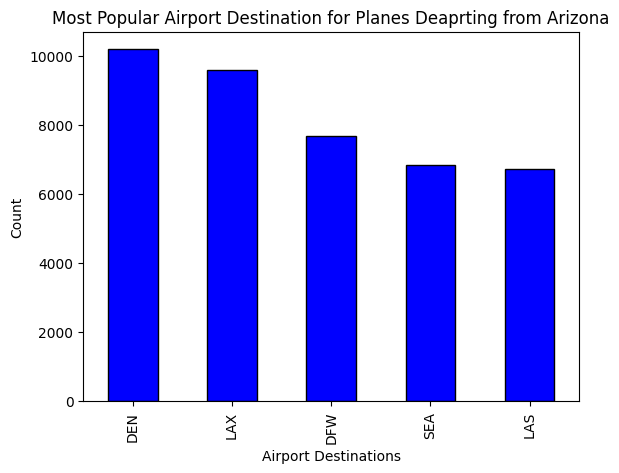

<ipython-input-54-071ca636a8b7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Count"] = 1


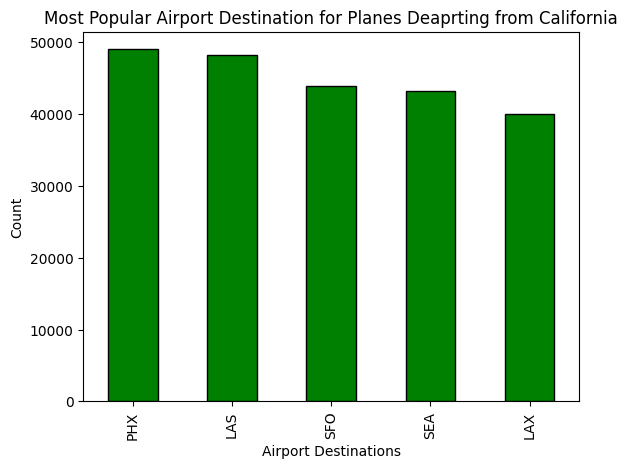

<ipython-input-54-071ca636a8b7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Count"] = 1


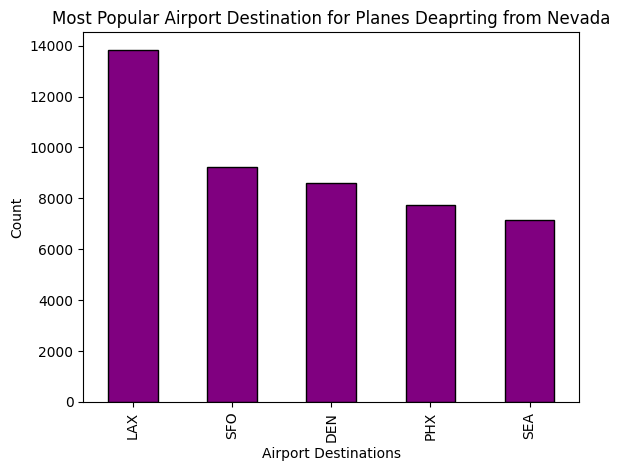

In [ ]:
# Define dataframes for flights departing from each state
AZ_depart = departing_st[departing_st["ORIGIN_ST"] == "AZ"]
CA_depart = departing_st[departing_st["ORIGIN_ST"] == "CA"]
NV_depart = departing_st[departing_st["ORIGIN_ST"] == "NV"]

# Combine the dfs into a list
states_lst = [AZ_depart, CA_depart, NV_depart]

def plot_pop_dest(df, colors, titles):
  # Count the number of flights to each destination
  df["Count"] = 1
  # Group by destination and sum the counts, and sort in descending order
  df = df.groupby("DEST")["Count"].sum().sort_values(ascending = False)
  # Select the top 5 most popular destination airports
  df = df[0:5]

  # Plot a bar chart
  df.plot(kind = "bar", color= colors, edgecolor = "black")
  plt.title(titles)
  plt.xlabel("Airport Destinations")
  plt.ylabel("Count")
  plt.show()

titles_lst = ["Arizona", "California", "Nevada"]
color_lst = ["blue", "green", "purple"]

# Iterate over the list of dfs and plot the most popular destination for each state
for i in range(len(states_lst)):
   title_st = "Most Popular Airport Destination for Planes Deaprting from " + titles_lst[i]
   plot_pop_dest(states_lst[i], color_lst[i], title_st)

Some common popular airports among each of the Regions include Denver (DEN), San Francisco (SFO), Phoenix (PHX), Los Angeles (LAX), and Seattle (SEA). From the graphs it appears that many of the planes go to similar destinations and that these destinations are popular across different states in America.

### Question 4 — (20 points)

1. Explore the carriers. Calculate the proportion of flights for each airline/operator. Visualize the top 10 results. Explain the results.
2. Analyze the flight delays for each Airline/Carrier and prepare summary statistics to explain the patterns in the delays. Visualize the results. Explain the patterns and demonstrate which carriers are more prone to flight delays.
Note: you will need to analyze the airlines/carriers across multiple airports in order to conclude that they have a pattern of being late.

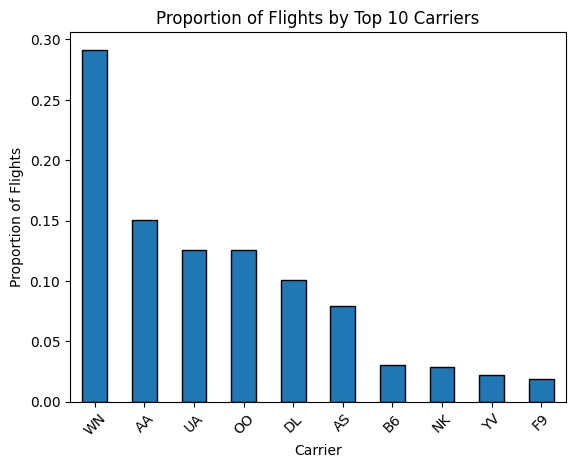

CARRIER_CODE
WN    0.291471
AA    0.150694
UA     0.12539
OO    0.125301
DL    0.100451
AS    0.078885
B6     0.03039
NK    0.028785
YV    0.022195
F9    0.018746
Name: count, dtype: Float64


In [ ]:
# Calculate the total number of flights for each carrier
carrier_flights = airline_df['CARRIER_CODE'].value_counts()

# Calculate the proportion of flights for each carrier
total_flights = carrier_flights.sum()
carrier_proportion = carrier_flights / total_flights

# Sort the carriers based on proportion of flights
sorted_carrier_proportion = carrier_proportion.sort_values(ascending=False)

# Visualize the top 10 carriers
top_10_carriers = sorted_carrier_proportion.head(10)

# Create bar plot for Top 10 Carriers' Proportions
top_10_carriers.plot(kind = "bar", edgecolor = "black")
plt.title('Proportion of Flights by Top 10 Carriers')
plt.xlabel('Carrier')
plt.ylabel('Proportion of Flights')
plt.xticks(rotation=45)
plt.show()

print(top_10_carriers)

In [ ]:
# Sum the top 10 carriers' proportions
total_proportion_top_10 = top_10_carriers.sum()
print("Total proportion of flights for top 10 carriers:", total_proportion_top_10)

Total proportion of flights for top 10 carriers: 0.9723078506383136


The chart above shows the top 10 carriers with the greatest proportion of flights. This gives us insights into the market share of different carriers in terms of the number of flights operated. From the chart, we can gather that Southwest Airlines (WN) has the highest proportion of flights (29%), indicating a dominance over the market. Southwest is followed by several major legacy airlines including American Airlines (AA; 15.2%), Skywest (OO; 12.8%), and United Airlines (UA; 12.3%). The remaining airlines in the top 10 all contain proportions less that 10%. The sum of the top 10 proportions is just over 97%, which indicates that all the airlines that were not included in the top 10 equal a combined proportion of under 3% of flights contained in the dataset.

                 count       mean        std  min  25%  50%   75%     max
CARRIER_CODE                                                             
AA            281138.0  14.611223  52.301902  0.0  0.0  0.0   8.0  2315.0
AS            147170.0  10.724285  31.655445  0.0  0.0  0.0   5.0  1117.0
B6             56697.0  16.466444  51.204729  0.0  0.0  0.0   8.0  1769.0
DL            187404.0  10.802896  41.060582  0.0  0.0  0.0   5.0  1266.0
EV                94.0   11.62766  31.291891  0.0  0.0  0.0   3.0   164.0
F9             34972.0  19.975866   44.73053  0.0  0.0  0.0  19.0   711.0
G4             33946.0  13.169917  48.209534  0.0  0.0  0.0   8.0  1540.0
HA             15699.0  11.033633  41.274101  0.0  0.0  0.0   9.0  1411.0
MQ              1770.0  11.116384  41.833731  0.0  0.0  0.0   7.0  1051.0
NK             53701.0  13.036219  45.523315  0.0  0.0  0.0   4.0  1434.0
OO            233763.0  14.410899  56.314034  0.0  0.0  0.0   1.0  1912.0
UA            233930.0  15.419266  50.

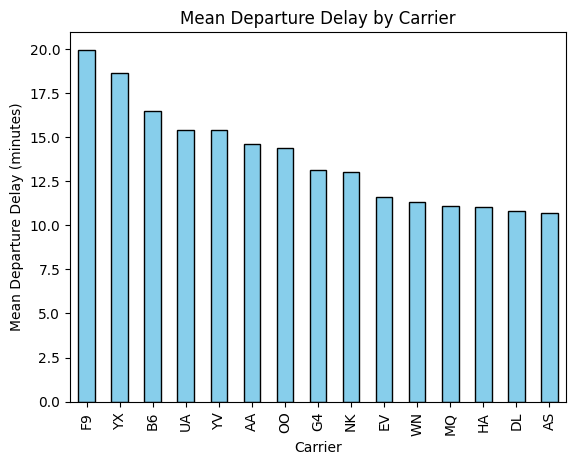

                   mean  <lambda_0>
CARRIER_CODE                       
F9            19.975866    0.432575
YX             18.62987    0.253247
B6            16.466444    0.341658
UA            15.419266    0.335998
YV            15.405477    0.291490
AA            14.611223    0.392145
OO            14.410899    0.256050
G4            13.169917    0.325281
NK            13.036219    0.305059
EV             11.62766    0.265957
WN            11.343759    0.479947
MQ            11.116384    0.352542
HA            11.033633    0.480413
DL            10.802896    0.351567
AS            10.724285    0.321091


In [ ]:
# Calculate summary statistics for each airline's departure delay
carrier_delays = airline_df.groupby('CARRIER_CODE')['DEP_DELAY'].describe()
print(carrier_delays)

# Gather mean and proportion for each airline
carrier_delay_stats = airline_df.groupby('CARRIER_CODE')['DEP_DELAY'].agg(['mean', lambda x: (x > 0).mean()]).rename(columns={'<lambda>': 'prop_delayed'})

# Sort carriers by mean delay
sorted_carrier_delay = carrier_delay_stats.sort_values(by='mean', ascending=False)

# Visualize the mean delay for each carrier
sorted_carrier_delay['mean'].plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Mean Departure Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Mean Departure Delay (minutes)')
plt.show()

print(sorted_carrier_delay)

The summary statistics and visualization show many patterns in flight delays across different carriers. The means range from 8 minutes to 18 minutes, indicating that the mean departure delay varies by carrier. From the visualization, we can conclude that the carrier with the highest average departure delay is Republic Airways (YX) with an average departure delay of 18.1 minutes. Other airlines with higher mean departure delays include Frontier Airlines (F9; 17.7 minutes), Mesa Airlines (YV; 16.7 minutes), and JetBlue (B6; 15.8 minutes). When investigating the standard deviation (std) of delays, we can see that there is significant variablility in delays across carriers. This indicates differences in the consistency of on-time flights. The carriers with higher standard deviations may be indicative of less reliable service in terms of departure punctuality. The proportion ("lambda_0") of delayed flights varies across carriers, ranging from 21% to 50%. The top three airlines with the highest proportion of delayed flights are Southwest Airlines (WN; 50%), Hawaiian Airlines (HA; 48%), and Frontier Airlines (F9; 39%). From this, we can conclude that airlines with higher proportions of delayed flights may have a consistent issue with punctuality. Lastly, it is crucial to investigate the proportion of delayed flights against the mean delay. Some carriers may have a lower mean delay but a higher proportion of delayed flights, indicating that while their average delay may not be significant, a large portion of their flights experience delays. Frontier Airlines (F9), for example has both a high mean delay (17.7 minutes; second highest mean) and a high proportion of delays (39%; third highest proportion), which suggests a consistent issue in punctuality. Meanwhile, Republic Airways (YX), has the highest mean delay (18.1 minutes) but the lowest proportion (21.4%), showing that while their average delay is high, a much smaller portion of their flights actually experience delays.

### Question 5 — (30 points)

1. Evaluate which airlines have the best record. Display the top 10.
2. For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines.
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.

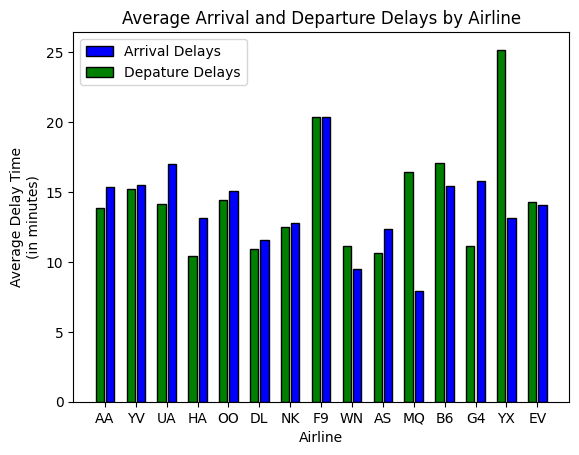

In [ ]:
# Get unique airline codes from the dataframe and convert them to a list
airline_list = airline_df['CARRIER_CODE'].unique().tolist()

# Calculate average arrival delays for each airline in specified states
arr_delays = []
for airline in airline_list:
    arr_delays_df = airline_df[(airline_df['CARRIER_CODE'] == airline) & (airline_df['DEST_ST'].isin(['CA', 'NV', 'AZ']))]
    arr_delay = round(arr_delays_df['ARR_DELAY'].mean(), 3)
    arr_delays.append(arr_delay)

# Calculate average departure delays for each airline in specified states
dep_delays = []
for airline in airline_list:
    dep_delays_df = airline_df[(airline_df['CARRIER_CODE'] == airline) & (airline_df['ORIGIN_ST'].isin(['CA', 'NV', 'AZ']))]
    dep_delay = round(dep_delays_df['DEP_DELAY'].mean(), 3)
    dep_delays.append(dep_delay)

# Determine where in the graph each bar is located
dep_points_lst = []
arr_points_lst = []
airport_points_lst = []
for i in range(len(airline_list)):
    dep_points_lst.append(i * 3 + 0.5)
    airport_points_lst.append(i * 3 + 1)
    arr_points_lst.append(i * 3 + 1.5)

# Plot bar chart
plt.bar(arr_points_lst, arr_delays, color = "blue", label  = "Arrival Delays", edgecolor = "black")
plt.bar(dep_points_lst, dep_delays, color = "green", label = "Depature Delays", edgecolor = "black")
plt.xticks(airport_points_lst, airline_list)
plt.title("Average Arrival and Departure Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay Time\n(in minutes)")
plt.legend()
plt.show()

This graph shows the mean arrival and departure delays at all 15 airports in this dataset. YX (Republic Airways) had the highest departure delay mean and F9 (Frontier Airlines) had the highest arrival delay mean. In most cases the arrival delay means were greater than or very closely behind the departure delay means, with the only major exceptions being MQ (American Eagle Airlines) and YX.

In [ ]:
# dictionary --> 'airline': ['arr_delay_mean', 'dep_delay_mean']
delays_dct = {}

for i in range(len(airline_list)):
    delays_dct[airline_list[i]] = [arr_delays[i], dep_delays[i]]

# Sort by arrival delay mean
sorted_by_arrival = sorted(delays_dct.items(), key=lambda x: x[1][0])
# Extract the top 10 airlines with the lowest arrival delay mean
top_10_arrival = sorted_by_arrival[:10]

# Sort by departure delay mean
sorted_by_departure = sorted(delays_dct.items(), key=lambda x: x[1][1])
# Extract the top 10 airlines with the lowest departure delay mean
top_10_departure = sorted_by_departure[:10]

# Print the results
print("Top 10 Airlines with the Lowest Arrival Delay Mean:")
for airline, delays in top_10_arrival:
    print(f"{airline}: {delays[0]} minutes")

print("\nTop 10 Airlines with the Lowest Departure Delay Mean:")
for airline, delays in top_10_departure:
    print(f"{airline}: {delays[1]} minutes")

Top 10 Airlines with the Lowest Arrival Delay Mean:
MQ: 7.905 minutes
WN: 9.482 minutes
DL: 11.554 minutes
AS: 12.385 minutes
NK: 12.784 minutes
YX: 13.104 minutes
HA: 13.11 minutes
EV: 14.043 minutes
OO: 15.098 minutes
AA: 15.35 minutes

Top 10 Airlines with the Lowest Departure Delay Mean:
HA: 10.423 minutes
AS: 10.602 minutes
DL: 10.892 minutes
WN: 11.1 minutes
G4: 11.103 minutes
NK: 12.478 minutes
AA: 13.838 minutes
UA: 14.154 minutes
EV: 14.277 minutes
OO: 14.436 minutes


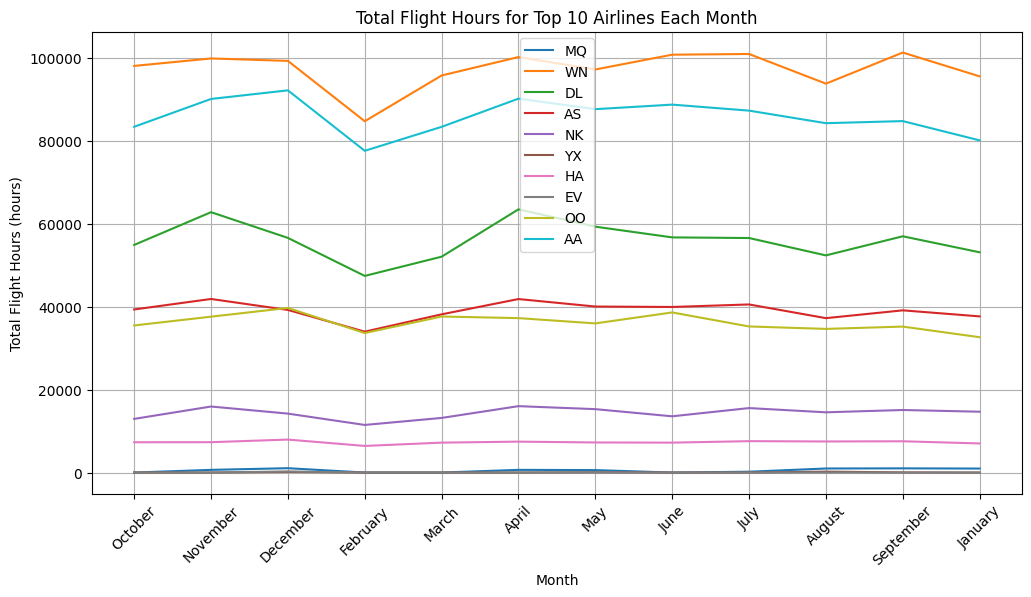

In [ ]:
# Extract the month from 'FL_DATE' and create new df column
airline_df['MONTH'] = airline_df['FL_DATE'].dt.month_name()

# Group the data by airline and month and calculate the total flight hours for each
flight_hours_per_month = airline_df.groupby(['MONTH', 'CARRIER_CODE'])['ELAPSED_TIME'].sum().unstack()

# Visualize the results for the top 10 airlines
top_10_airlines = [airline[0] for airline in top_10_arrival]
months = list(airline_df['MONTH'].unique())

# Fill NA values with zeros
flight_hours_per_month.fillna(0, inplace=True)

# Plot line chart
plt.figure(figsize=(12, 6))
for airline in top_10_airlines:
    flight_hours = flight_hours_per_month.loc[:, airline] / 60  # Convert minutes to hours
    plt.plot(months, flight_hours, label=airline)

plt.xlabel('Month')
plt.ylabel('Total Flight Hours (hours)')
plt.title('Total Flight Hours for Top 10 Airlines Each Month')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Southwest consistently has the greatest amount of flight hours across all months. Pretty much all of the airlines in the top 10 are consistent in their placing across all motnhs, with only slight overlap between Alaska Airlines and SkyWest Airlines during months December-March.

### Question 6 — (20 points)

Select any (3) aircraft, and explore the data to determine where it often travels. Calculate its average arrival and departure delays at the airports. After which analyze all the results to identify any patterns that are evident and also indicate which airline operates that aircraft. Explain your findings and visualize the results.
Note: the TAIL_NUM can help you to identify each unique aircraft.

In [ ]:
# Get the top three most common tail numbers
top_three = airline_df['TAIL_NUM'].value_counts().sort_values(ascending=False).head(3).index.tolist()
top3_df = airline_df[airline_df['TAIL_NUM'].isin(top_three)]
print(top_three)
top3_df

['N706SK', 'N726SK', 'N742SK']


,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE,MONTH
879,2019-10-01,OO,N706SK,2957,LAX,CA,FAT,CA,14:13:00,0,15:11:00,0,58,209,October
882,2019-10-01,OO,N726SK,2959,PHX,AZ,GJT,CO,18:56:00,0,21:23:00,0,87,438,October
910,2019-10-01,OO,N726SK,3038,BFL,CA,PHX,AZ,05:53:00,0,07:05:00,0,72,425,October
923,2019-10-01,OO,N742SK,3060,PHX,AZ,YUM,AZ,18:57:00,0,19:52:00,0,55,160,October
4141,2019-10-01,OO,N742SK,3176,YUM,AZ,PHX,AZ,08:08:00,0,09:18:00,9,70,160,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893303,2019-01-31,OO,N742SK,3264,LAX,CA,SAN,CA,18:31:00,0,20:02:00,40,91,109,January
1893304,2019-01-31,OO,N742SK,3264,SAN,CA,LAX,CA,22:31:00,154,23:26:00,146,55,109,January
1896887,2019-01-31,OO,N742SK,2957,FAT,CA,LAX,CA,16:35:00,7,17:57:00,19,82,209,January
1896888,2019-01-31,OO,N742SK,2957,LAX,CA,FAT,CA,15:13:00,23,16:15:00,21,62,209,January


In [ ]:
# For the top three aircrafts, return the top 3 destination airports
top3_top_dest = {}
for aircraft in top_three:
    # filter df by aircraft and destination state
    curr_df = airline_df[(airline_df['TAIL_NUM'] == aircraft) & (airline_df['DEST_ST'].isin(['CA', 'NV', 'AZ']))]
    # find top 3 destination airports for aircraft and add to dictionary
    curr_top_dest = curr_df['DEST'].value_counts().sort_values(ascending=False).head(3).index.tolist()
    top3_top_dest[aircraft] = curr_top_dest
print(top3_top_dest)

# For the top three aircrafts, return the top 3 origin airports
top3_top_orig = {}
for aircraft in top_three:
    # filter df by aircraft and destination state
    curr_df = airline_df[(airline_df['TAIL_NUM'] == aircraft) & (airline_df['ORIGIN_ST'].isin(['CA', 'NV', 'AZ']))]
    # find top 3 origin airports for aircraft and add to dictionary
    curr_top_orig = curr_df['ORIGIN'].value_counts().sort_values(ascending=False).head(3).index.tolist()
    top3_top_orig[aircraft] = curr_top_orig
print(top3_top_orig)

{'N706SK': ['PHX', 'LAX', 'YUM'], 'N726SK': ['PHX', 'LAX', 'FAT'], 'N742SK': ['PHX', 'LAX', 'FAT']}
{'N706SK': ['PHX', 'LAX', 'FAT'], 'N726SK': ['PHX', 'LAX', 'FAT'], 'N742SK': ['PHX', 'LAX', 'FAT']}


[9.076, 7.692, 12.5]


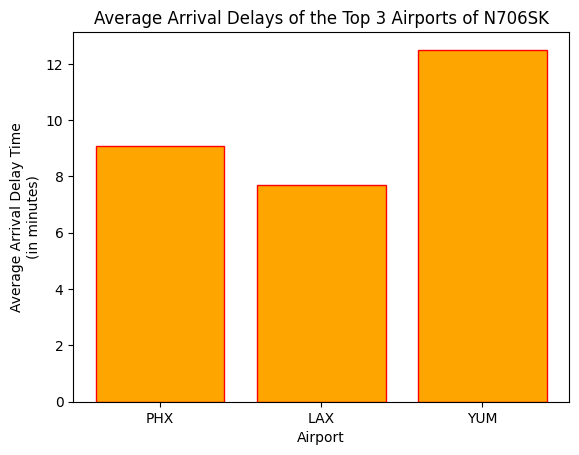

[14.364, 7.107, 7.687]


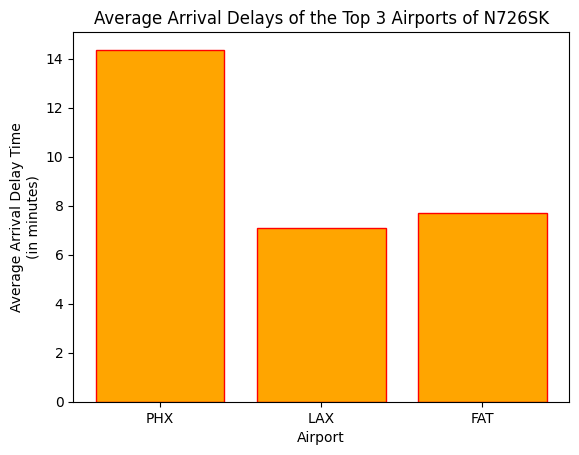

[13.13, 14.458, 7.938]


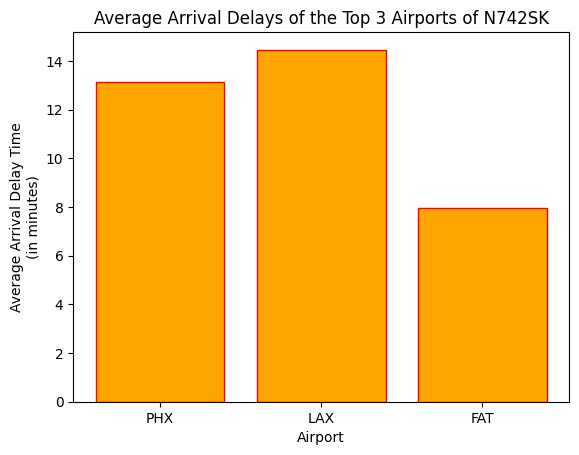

In [ ]:
for aircraft in top_three:
    # Initialize a list to store avg arrival delays for each dest airport
    dest_delays = []

    # Filter the df to only include CA, NV, and AZ as destinations
    aircraft_df = airline_df[(airline_df['TAIL_NUM'] == aircraft) &
     (airline_df['DEST_ST'].isin(['CA', 'NV', 'AZ']))]

    # Loop through each destination airport associated with the current aircraft
    for airport in top3_top_dest[aircraft]:
        airport_df = aircraft_df[aircraft_df['DEST'] == airport]
        # Calculate average arrival delay for the current destination airport
        delay = round(airport_df['ARR_DELAY'].mean(), 3)
        # Append the average arrival delay to the list
        dest_delays.append(delay)

    print(dest_delays)

    # Plot a bar chart
    plt.bar(top3_top_dest[aircraft], dest_delays, color='orange', edgecolor='red')
    plt.title(f'Average Arrival Delays of the Top 3 Airports of {aircraft}')
    plt.xlabel('Airport')
    plt.ylabel('Average Arrival Delay Time\n(in minutes)')
    plt.show()

Based on the above graph, we can see that the PHX (Phoenix), LAX (Los Angeles), FAT (Fresno), and YUM (Yuma) airports were the most frequently travelled to airports of these three aircrafts. The average arrival delays were not very high all being under 15 minutes. LAX appears to have the highest average arrival delay for a specific aircraft, while PHX appears to have higher delay averages across the board.

[8.633, 8.367, 5.074]


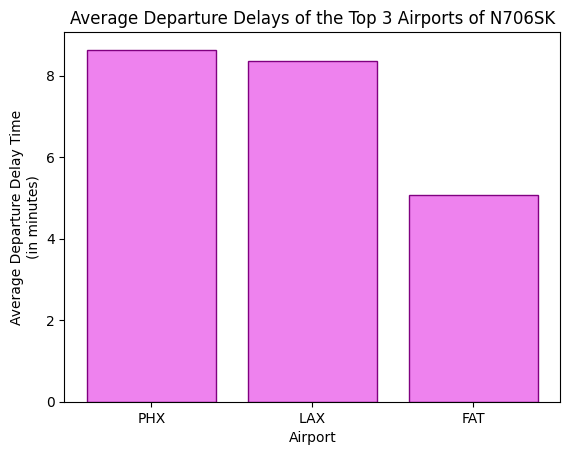

[8.176, 6.366, 8.422]


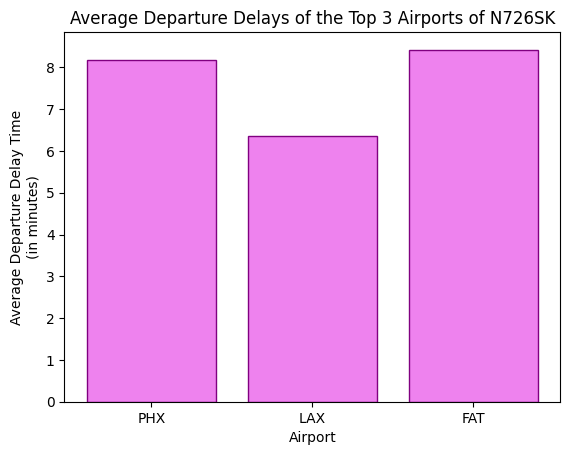

[8.071, 14.278, 13.475]


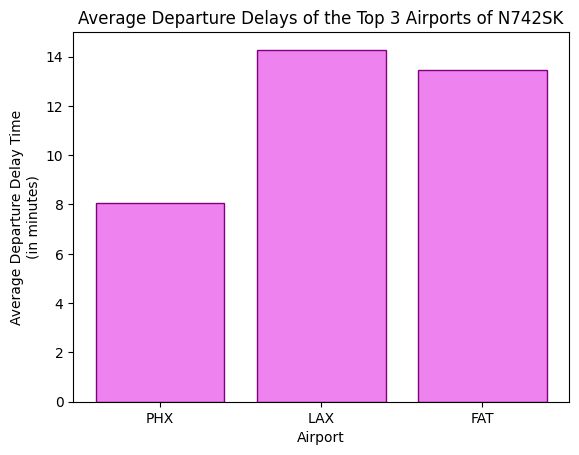

In [ ]:
# Loop through each of the top three most common tail numbers
for aircraft in top_three:
    # Initialize a list to store avg departure delays for each origin airport
    orig_delays = []

    # Filter the df to only include CA, NV, and AZ as destinations
    aircraft_df = airline_df[(airline_df['TAIL_NUM'] == aircraft) & (airline_df['ORIGIN_ST'].isin(['CA', 'NV', 'AZ']))]

    # Loop through each destination airport associated with the current aircraft
    for airport in top3_top_orig[aircraft]:
        airport_df = aircraft_df[aircraft_df['ORIGIN'] == airport]
        delay = round(airport_df['DEP_DELAY'].mean(), 3)
        orig_delays.append(delay)

    print(orig_delays)

    # Plot a bar chart
    plt.bar(top3_top_orig[aircraft], orig_delays, color='violet', edgecolor='purple')
    plt.title(f'Average Departure Delays of the Top 3 Airports of {aircraft}')
    plt.xlabel('Airport')
    plt.ylabel('Average Departure Delay Time\n(in minutes)')
    plt.show()

Based on the above graph, we can see that the PHX (Phoenix), LAX (Los Angeles), and FAT (Fresno)airports were the origin airports that these three aircrafts most frequently flew from. The average departure delays were not very high all being under 15 minutes, and most being under 9. LAX appears to have the highest average departure delay for a specific aircraft.

In [ ]:
for aircraft in top_three:
    curr_df = airline_df[airline_df['TAIL_NUM'] == aircraft]
    print(f"{aircraft} belongs to {curr_df['CARRIER_CODE'].tolist()[0]}")

N706SK belongs to OO
N726SK belongs to OO
N742SK belongs to OO


All three of the most flown aircrafts in this dataset belong to SkyWest airlines.